<a href="https://colab.research.google.com/github/DChhipani/gdpr/blob/main/gdpr/code/01_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wordcloud matplotlib

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import zipfile
import os
import pickle

# regex
import re

# word cloud
from wordcloud import WordCloud



### Extract Data from the Zip File

In [ ]:
# Unzip folder
zip_file_path = '/content/drive/MyDrive/GDPR/GDPR/Data/policies_fromseg_custom.zip'
extracted_folder_path = '/content/drive/MyDrive/GDPR/GDPR/Data/'
policy_texts_path = '/content/drive/MyDrive/GDPR/GDPR/Data/policies_fromseg_custom'

# Create a folder to extract the contents
os.makedirs(extracted_folder_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)



In [ ]:
# Load files into a dataframe

directory_path = '/content/drive/MyDrive/GDPR/GDPR/Data/policies_fromseg_custom'
file_names = os.listdir(directory_path)
print(len(file_names))


37389


In [ ]:
filepath= '/content/drive/MyDrive/GDPR/GDPR/Data/policies_fromseg_custom/'
documents = [open(filepath+path, 'r').read() for path in file_names]

In [ ]:
df = pd.DataFrame({"privacy_policy_id": [file[3:-4] for file in file_names], "content": documents})
df.to_pickle('/content/drive/MyDrive/GDPR/GDPR/Data/policy_data_raw.pkl')
df.head(1)

privacy_policy_id  \
0  0180e47154fd3768cdc1b692f705231f04606dc6845d09b2facac   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

### Find websites using regex

In [ ]:
def find_websites(text):
    # Regex pattern for identifying URLs
    pattern = r'https?://\S+|www\.\S+'

    # Find all matches in the text
    matches = re.findall(pattern, text)

    return matches


In [ ]:
df['websites'] = df['content'].apply(find_websites)
df.to_pickle('/content/drive/MyDrive/GDPR/GDPR/Data/policy_data_raw.pkl')
print('Privacy policies without any websites: ',len(df[df['websites'].apply(lambda x: len(x) == 0)]))
print('Check websites:')
filtered_df = df[df['websites'].apply(lambda x: len(x) > 0)]
display(filtered_df['websites'].sample(10))

Privacy policies without any websites:  11947
Check websites:


26269                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      [https://web.archive.org/web/20130218160659/http://www.gartner.com:80/technology/about/policies/privacy_principles.jsp]
32806                                                                                                                                                                                                                                                                                                                                

In [ ]:
urls = filtered_df['websites'].apply(lambda x: ', '.join(map(str, x)))
urls = ', '.join(urls)
urls

'www.twitter.com, www.twitter.com/tos,, https://web.archive.org/web/20101123000821/http://gyazo.com/doc/privacy, http://gyazo.com, www.cars.com,, www.hotjar.com,, https://wiki.mozilla.org/Contribute/Dashboards., www.mozilla.org., http://www.usa.gov/optout_instructions.shtml., http://tools.google.com/dlpage/gaoptout., https://www.ssa.gov/foia/html/pia.htm, http://www.usa.gov/optout_instructions.shtml., www.socialsecurity.gov., http://www.mailchimp.com,http://www.tinyletter.com,, http://www.mandrill.com., http://preferences-mgr.truste.com/, http://www.youronlinechoices.eu/)., https://www.privacyshield.gov/welcome., https://www.privacyshield.gov/list., https://feedback-form.truste.com/watchdog/request., https://www.privacyshield.gov/article?id=How-to-Submit-a-Complaint,, https://web.archive.org/web/20051031024508/http://www.mininova.org:80/privacy/, https://www.teamviewer.com/en/privacy-policy/?policy=cookies., https://www.lithium.com/privacy., https://eur-lex.europa.eu/legal-content/EN/T

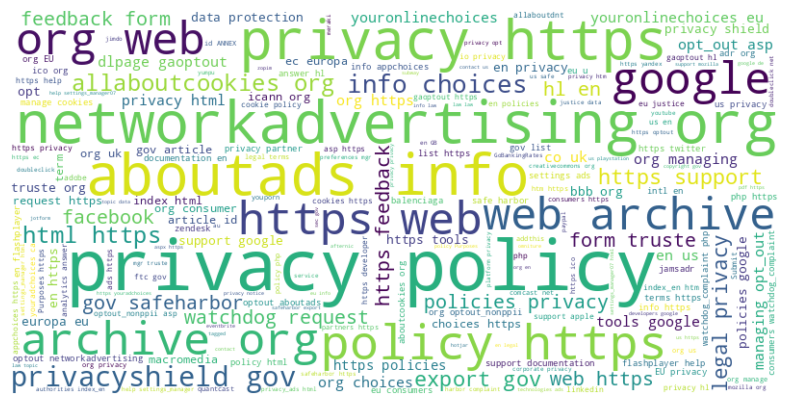

In [ ]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(urls)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [ ]:
word_frequencies = wordcloud.words_

for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')
    if frequency

privacy policy: 1.0
networkadvertising org: 0.7986371853706021
aboutads info: 0.7647058823529411
privacy https: 0.7142261159783062
policy https: 0.5652899457655403
archive org: 0.5047976637463496
https web: 0.5039632874426366
org web: 0.5025726602697816
web archive: 0.5020164094006397
google: 0.4950632735363649
privacyshield gov: 0.46975385899040467
info choices: 0.3799193436239744
allaboutcookies org: 0.311639549436796
html https: 0.3095536086775136
https support: 0.2676957307745793
export gov: 0.2656097900152969
legal privacy: 0.2503128911138924
gov safeharbor: 0.23738005840634127
facebook: 0.23432067862606035
policies privacy: 0.23098317341120844
https feedback: 0.22319566124322068
feedback form: 0.21818940342094284
watchdog request: 0.21721596439994437
form truste: 0.2169378389653734
hl en: 0.21193158114309554
web https: 0.20525657071339173
youronlinechoices eu: 0.19927687387011542
opt_out asp: 0.19927687387011542
tools google: 0.19858156028368795
youronlinechoices: 0.1977471839799

In [ ]:
# Searching for privacy policy webpage

tokens = ['privacy', 'policy', 'policies', 'support', 'cookies', 'copyright', 'help', 'setting', 'legal', 'manage', 'info', 'law', 'info','advertis','ads', 'complain', 'opt', 'terms', 'data', 'protection', 'feedback', 'trust', 'analytics', 'service', 'preference', 'purpose', 'gov', 'safe', 'consumer', 'eu', 'archive', 'network']

regex_pattern = '|'.join(map(re.escape, tokens))

# Filter websites that contain any of the tokens
filtered_df = filtered_df[filtered_df['websites'].apply(lambda items: any(pd.Series( items).str.contains(regex_pattern)))]
filtered_df.to_pickle('/content/drive/MyDrive/GDPR/GDPR/Data/policy_urls.pkl')

print('Number of privacy policy webpage URLs found:', len(filtered_df))
display(filtered_df['websites'].head())

Number of privacy policy webpage URLs found: 20431


2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### Create Labels

Website for labelling - https://gdprwise.eu/policy-checker/

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

# Set the path to your ChromeDriver executable
chromedriver_path = '/path/to/chromedriver'

# Create a new instance of the Chrome driver
driver = webdriver.Chrome(executable_path=chromedriver_path)

# Open the website
driver.get('https://gdprwise.eu/policy-checker/')

# Find the textbox element by its HTML attribute (id, name, class, etc.)
textbox = driver.find_element("id", "your_textbox_id")

# Input text into the textbox
textbox.send_keys("Your input text")

# Simulate pressing Enter key (optional)
textbox.send_keys(Keys.RETURN)

# Wait for a while to let the page update (adjust as needed)
time.sleep(2)

# Read the displayed content (e.g., read from a specific element)
displayed_content = driver.find_element("id", "displayed_content_id").text
print("Displayed Content:", displayed_content)

# Close the browser
driver.quit()


###  old code

Define Database Model for raw data

1.   Preprocessing and cleaning the data
2.   Checking for empty files


In [ ]:
import os
import re
from bs4 import BeautifulSoup
import spacy

# Directory where you extracted the policy text files
policy_texts_path = '/content/gdpr/policies_fromseg_custom'

# List all files in the extracted folder
policy_files = os.listdir(policy_texts_path)

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

# Read the content of the selected file
with open(first_policy_file, 'r', encoding='utf-8') as file:
    policy_content = file.read()

# Count the number of empty text files
empty_files_count = 0

# Clean and preprocess the text using NLP techniques
def clean_and_preprocess(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove special characters, numbers, and other non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Additional cleaning steps can be added based on your specific requirements

    return text

# Iterate through all text files
for file_hash in policy_files:
    file_path = os.path.join(policy_texts_path, file_hash)

    # Check if the file is a text file (optional)
    if file_hash.endswith('.txt'):
        # Read the content of the file
        with open(file_path, 'r', encoding='utf-8') as file:
            policy_content = file.read()

        # Clean and preprocess the policy text
        cleaned_policy_text = clean_and_preprocess(policy_content)

        # Check if the cleaned text is empty
        if not cleaned_policy_text.strip():
            empty_files_count += 1
            print(f"Empty text file found: {file_hash}")

# Display the number of empty text files
print(f"Number of empty text files: {empty_files_count}")



Empty text file found: 31b2537ab2f3dfe36c3c5d98c304355ffd6e6c3aed5c75f0f89a74c3.txt
Empty text file found: 2a4d1c9af5d8fc534f1d90e388e12f432e63bd1c7e36230991c85871.txt
Empty text file found: 718e4caa1c6fd11f1e7865cba8a043fe1ae8bb5d0b645f89cc4d1f90.txt
Empty text file found: 9d54d40ac2b9fd9155f4fe0177bfa925ffc48330977f84c7c16b7ced.txt
Empty text file found: 36ea8f2568b1619a4c2cf1d4a0810631130d8a2445b0e9e3d429844e.txt
Empty text file found: 195a7ab38cd0d63a3b8d771515516ec34151b8e0794e3de61cd2c1c8.txt
Empty text file found: 876dd82a35abf9e84dd24a22c7516f18cf4a52a20c922246494d0e05.txt
Empty text file found: 9b6b1fce61ccbc18afbadd5ad7d33e43c3da7a21d0d4bb103010f190.txt
Empty text file found: 0ee878ddeb706b2a19b58e114d78ee7adacd6dc90061b3d30b9db1c9.txt
Empty text file found: 94f6edadd919e65dd4e5914e8813f689f4dc496d8cb0e4e2b82c3249.txt
Empty text file found: 4fee03707b32ff9f012905a641e8aa327cf4f804bdf94cb4b3a9c53b.txt
Number of empty text files: 11


Reading a processed file

In [ ]:
# Display the cleaned and preprocessed text
print(f"Original Policy Text:\n{policy_content}\n")
print(f"Cleaned and Preprocessed Policy Text:\n{cleaned_policy_text}")


NameError: name 'policy_content' is not defined

Defining a dataframe for processed data

In [ ]:
import os
import pandas as pd
import re
from bs4 import BeautifulSoup

# Directory where you extracted the policy text files
policy_texts_path = '/content/gdpr/policies_fromseg_custom'

# List all files in the extracted folder
policy_files = os.listdir(policy_texts_path)

# Create an empty list to store data
processed_data = []

# Clean and preprocess the text using NLP techniques
def clean_and_preprocess(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove special characters, numbers, and other non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Additional cleaning steps can be added based on your specific requirements

    return text

# Iterate through all text files
for file_hash in policy_files:
    file_path = os.path.join(policy_texts_path, file_hash)

    # Check if the file is a text file (optional)
    if file_hash.endswith('.txt'):
        # Read the content of the file
        with open(file_path, 'r', encoding='utf-8') as file:
            policy_text = file.read()

        # Clean and preprocess the policy text
        cleaned_policy_text = clean_and_preprocess(policy_content)

        # Append data to the list
        processed_data.append({
            'File_Hash': file_hash,
            'Cleaned_Policy_Text': cleaned_policy_text
        })

# Create a Pandas DataFrame from the list of data
df = pd.DataFrame(processed_data)

# Save the DataFrame as a pickle file
processed_pickle_file_path = '/content/gdpr/processed_policy_data.pkl'
df.to_pickle(processed_pickle_file_path)

# Display the saved DataFrame
print(f"Processed DataFrame saved to: {processed_pickle_file_path}")


Processed DataFrame saved to: /content/gdpr/processed_policy_data.pkl


In [ ]:
# Display the DataFrame
print(df.head())

#verifying the number of policies
print(len(df))

                                           File_Hash  \
0  183a49ef709c941f0861842c080093499f48ec83c01c83...   
1  187dec44b14fd28a8361cce9cf1d02cd07424a31cebfe3...   
2  1bcaed1fefe2dd43ef4d207455dcb21df283fe456b98f8...   
3  2a649b3edd47a339a782ecb4fe421afe40a4c120957f98...   
4  03b6a07e018bc96a8af30ac0903001e8a1c520a02dd926...   

                                 Cleaned_Policy_Text  
0  last modified august  \nyour use of our servic...  
1  last modified august  \nyour use of our servic...  
2  last modified august  \nyour use of our servic...  
3  last modified august  \nyour use of our servic...  
4  last modified august  \nyour use of our servic...  
37389
